# Bicycle kinematic model simulator

Simulation of bicycle motion using kinematic model and 4th order Runge-Kutta discretization

Created by: 

    Francisco Javier Garcia Rosas 2017
    Technische Universität Kaiserslautern

In [1]:
# Import dependencies
from __future__ import division, print_function
%matplotlib inline

from BicycleTrajectory2D import *
from BicycleUtils import *
from FormatUtils import *
from PlotUtils import *

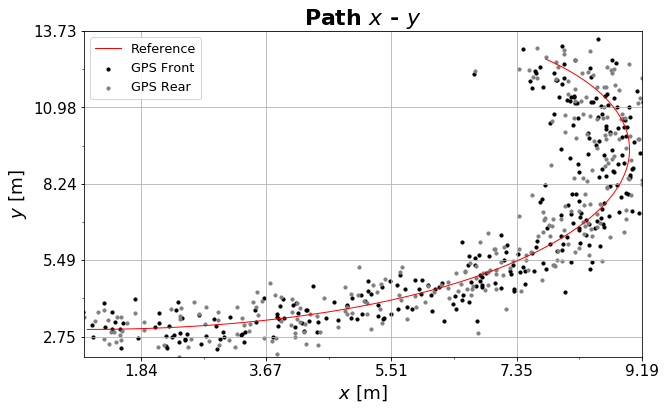

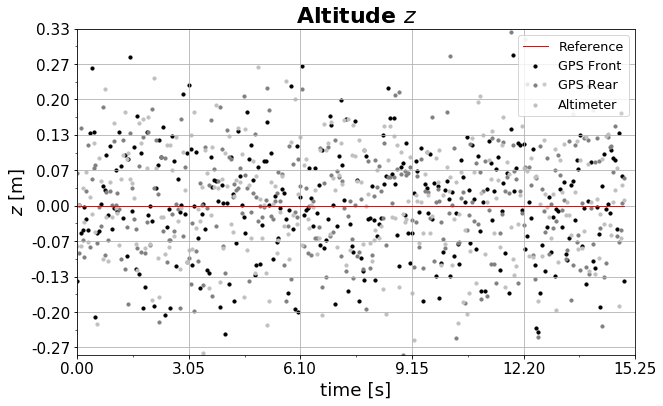

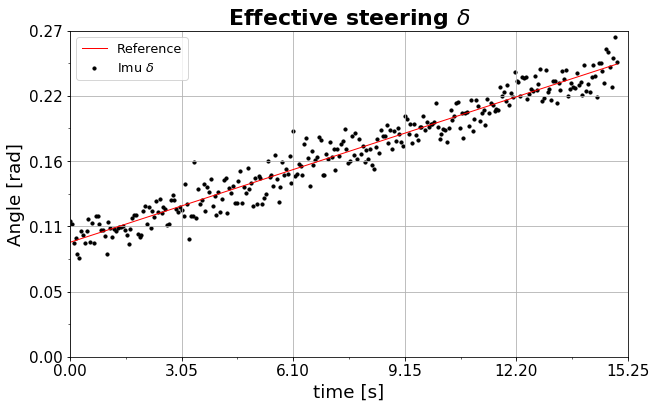

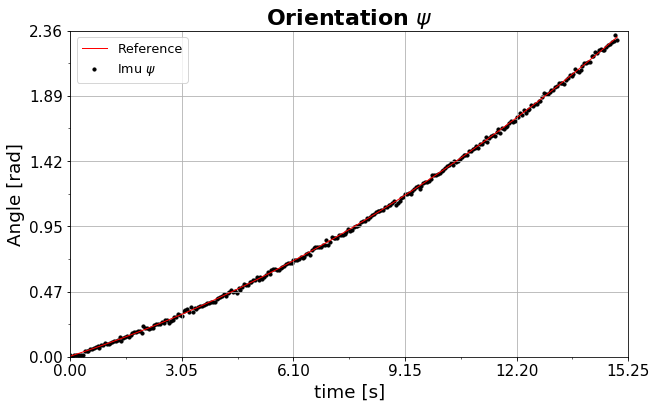

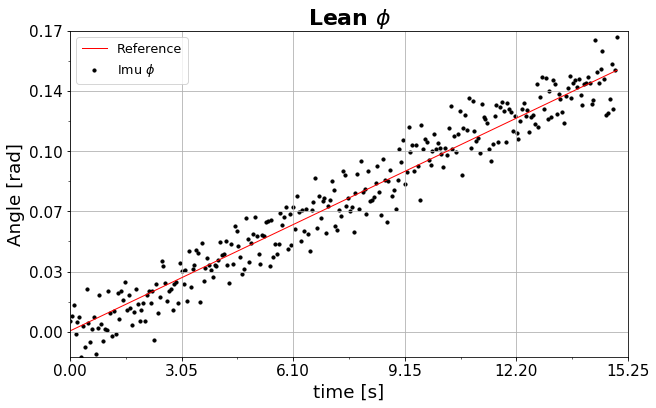

In [2]:
[N, dt, wheel_distance] = [300, 0.05, 1.1]  # simulation parameters
add_noise = True  # Enable/disable gaussian noise
fileName = ""  # File name prefix for final SVG images

# Define initial state --------------------------------------------------------
delta = math.radians(6)
phi = math.radians(0)
X_init = np.array([1.0, 3.0, 0.0, np.tan(delta)/wheel_distance, 0.0, phi]) # [x, y, z, sigma, psi, phi]

# Define constant inputs ------------------------------------------------------
U_init = np.array([1.0, 0.01, 0.01]) # [v, phi_dot, delta_dot]

# Define standard deviation for gaussian noise model --------------------------
# [xf, xr, yf, yr, zf, zr, za, delta, psi, phi]
noise = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

if add_noise:
    noise = [0.5, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01]
    fileName += "noise"
else:
    fileName += "no_noise"

# Create object simulator ------------------------------------------------------
bike = BicycleTrajectory2D(X_init=X_init, U_init=U_init, noise=noise)

# Simulate path ----------------------------------------------------------------
(gt_sim, zs_sim, time) = bike.simulate_path(N=N, dt=dt)

pathOutputSimulation = 'simulations/' + fileName

# Convert from Pandas Dataframe into numpy array
(gt, zs) = convert_object_to_array(gt_sim, zs_sim)

# Plot state variables
plot_simulate_state_variables(gt=gt, sim=zs, time=time, file_name=pathOutputSimulation)